# Deep Learning - Assignment 1

Submitted by,

Sampritha Hassan Manjunath (19232922)

Saurabh Shashikanth Hebbalkar (19232697)

---




# PART 1 - Feed Foward and Back Propogation Neural Network

Brief description of algorithm, including references to sources used:


> Answer: "Feed-Forward Neural Networks are the quintessential deep learning models. The goal of a feed-forward network is to approximate some funtion f*" (Goodfellow-et-al-2016). We are implementing a feed-forward neural network with back propagation with single hidden layer to approximate some function which can classify the data. The model uses Sigmoid activation function for Hidden and Output layer. We are randomly initializing the weights and biases; calculating the error; and updating the weights and biases using backpropagation.


References: 

http://www.deeplearningbook.org/contents/mlp.html - (Chapter 6)

https://machinelearningmastery.comhow-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/

https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7


In [0]:
'''Creating a singe layered neural network class which will be used for 
PART 2 (Circle data) and PART 3 (CIFAR image classification)'''

import numpy as np

# Single layer Neural Network Algorithm with Feed Forward and Back propagation
class NeuralNetwork:

  # Saurabh
  # Defining activation function for feed forward
  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

  # Saurabh
  # Defining activation function for back propogation
  def sigmoid_derivative(self, x):
    return x * (1 - x)


  # Sampritha
  ''' Initialize neural network with the following:
      1. Number of input nodes
      2. Number of nodes in hidden layer
      3. Number of output nodes
      4. Weights and bias'''
  def __init__(self, X, hidden_node, output_node=1):
    input_node = X.shape[1]

    # Initialize weights
    self.weight1 = 2 * np.random.random((input_node,hidden_node)) - 1
    self.weight2 = 2 * np.random.random((hidden_node,output_node)) - 1

    # Initialize bias
    self.bias1 = 2 * np.random.random((1, hidden_node)) - 1
    self.bias2 = 2 * np.random.random((1, output_node)) - 1


  # Train Neural network
  def fit(self, X, y, learning_rate=0.01, epochs=10000):

    # Train model for number of iterations(epochs) specified
    for i in range(epochs):
      # Saurabh
      # Initializing layers - Feed Forward 
      input_layer = X
      hidden_layer = self.sigmoid(np.dot(input_layer , self.weight1) + self.bias1)
      output_layer = self.sigmoid(np.dot(hidden_layer , self.weight2) + self.bias2)
      
      # Sampritha
      # Calculating error in each layer - BackPropagation
      output_error = y - output_layer
      output_delta = output_error * self.sigmoid_derivative(output_layer)
      
      # Sampritha
      # Propogating error to hidden layer from output layer
      hidden_error = output_delta.dot(self.weight2.T)
      hidden_delta = hidden_error * self.sigmoid_derivative(hidden_layer)

      # Sampritha
      # Update weights by obtained deltas
      self.weight2 += hidden_layer.T.dot(output_delta) * learning_rate
      self.weight1 += input_layer.T.dot(hidden_delta) * learning_rate

      # Sampritha
      # Update bias by obtained deltas
      self.bias2 += np.sum(output_delta,axis=0) * learning_rate
      self.bias1 += np.sum(hidden_delta,axis=0) * learning_rate

  # Saurabh
  # Define function to predict test data
  def predict(self, X): 
    w1 = self.sigmoid(np.dot(X, self.weight1)  +  self.bias1)
    w2 = self.sigmoid(np.dot(w1, self.weight2)  + self.bias2)

    # Threshold for classification
    if(w2 >= 0.5):
        a = 1
    else:
        a = 0
    return a


# PART 2 - Circles dataset classification

Accuracy :  100.0


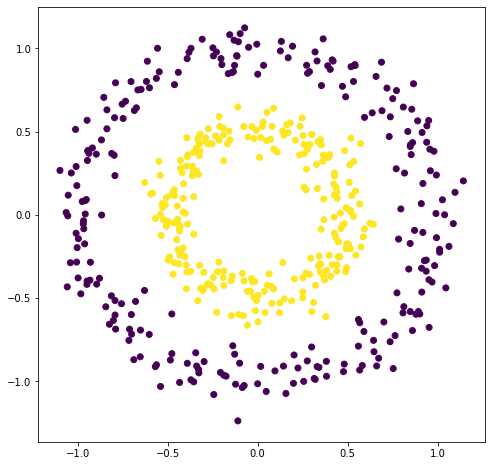

In [39]:
# Importing required libraries
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt

# Saurabh
# Load CSV data
data = pd.read_csv("./circles500.csv")
# Extract features (X) and labels (y)
X = data.drop(data.columns[len(data.columns)-1], axis=1).values
y = np.array(data[['Class']])
# Split data into train and test in 7:3 ratio
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
# Initialize Neural network with 3 nodes in hidden layer
nn = NeuralNetwork(X, 3)
# Train the model
nn.fit(X_train, y_train)

# Sampritha
correct_pred = 0
# Predict each feature in hold out data (test data)
for i,x in enumerate(X_test):
  y_pred = nn.predict(x)
  if(y_pred == y_test[i]):
    correct_pred += 1
# Calculate and print accuracy of the model
print("Accuracy : ", correct_pred/len(y_test) * 100)


# Saurabh
# Plotting (on whole dataset)
result = []
# Predict all features using trained NN
for x in X:
  result.append(nn.predict(x))
# Plotting each feature accorinding to the predicted class
x = X[:,0]
y = X[:,1]
label = result
fig = plt.figure(figsize=(8,8)) 
colors = ['blue' if label == 1 else 'red' for label in y] 
plt.scatter(x, y, c=label)

# PART 3 - Image Classification

Our group is assigned to classify Cat and Dog

In [0]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split

# To load image data
# Taken from Assignment Notes provided by Prof. Michael Madden
def unpickle(file):
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

# To load the data batch specified
# Taken from Assignment Notes provided by Prof. Michael Madden
def loadbatch(batchname):
  folder = 'cifar-10-batches-py'
  batch = unpickle(folder+"/"+batchname)
  return batch

# To load labels from data
# Taken from Assignment Notes provided by Prof. Michael Madden
def loadlabelnames():
  folder = 'cifar-10-batches-py'
  meta = unpickle(folder+"/"+'batches.meta')
  return meta[b'label_names']

# Sampritha
# To convert images to grey scale
def rgb2grey(data):
  # Using first 1024 values (one color) from data batch to convert to grey scale
  grey = np.zeros((data.shape[0],1024))
  for i in range(data.shape[0]): 
    grey[i] = np.add(grey[i],data[i][:1024])
  return grey


# Function to load specific images - CAT & DOG
def load_img_data(): 
  # Saurabh           
  # Load 1 batch of data
  batch1 = loadbatch('data_batch_1')
  print("Number of items in batch is : ", len(batch1))
  print("Keys in the batch : ", batch1.keys())
  # Extract features
  data = batch1[b'data']
  # Extract labels
  labels = batch1[b'labels']
  print("Total data : ", len(labels))
  # Convert RGB to grey scale
  grey = rgb2grey(data)
  # Reshaing labels to get 1D array as a single column
  label = np.array([labels])
  label = label.transpose()
  # Create data by combing grey sclaed values and label
  img_data = np.append(grey, label, axis=1)
  # Filter out only CAT and DOG images from the whole batch
  cat = img_data[img_data[:, -1]==3]
  dog = img_data[img_data[:, -1]==5]
  # Combine CAT and DOG data into single data frame
  cat_dog = np.concatenate((cat,dog), axis = 0)

  # Sampritha
  # Split into features and labels
  X = cat_dog[:,:-1]
  n = X.shape[0]
  # Taking last column as labels
  y = np.ones((n,1))
  y = np.reshape(cat_dog[:,-1],(n,1))
  # Replacing 3 and 5 labels to 0 and 1 for readability
  for i in range(len(y)):
    if(y[i]==3):
      y[i] = 0
    if(y[i]==5):
      y[i] = 1
  # Normalize the data to bring the image into familiar range
  X=X/255

  return X, y

In [41]:
# Saurabh
# Load image data
X, y = load_img_data()
# Spli train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# Initialize Neural network with 4 nodes in hidden layer
nn = NeuralNetwork(X, 4)
# Train the model
nn.fit(X_train, y_train)

# Sampritha
correct_pred = 0
# Predict each image in test data
for i,x in enumerate(X_test):
  y_pred = nn.predict(x)
  if(y_pred == y_test[i]):
    correct_pred += 1
# Calculate and print accuracy
print("Accuracy : ", correct_pred/len(y_test) * 100)

Number of items in batch is :  4
Keys in the batch :  dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Total data :  10000
Accuracy :  58.139534883720934


# PART 4 - Sampritha Hassan Manjunath

Enhancement:
1. Hidden Layers: The number of layers in hidden layers are increased from 1 to 3. This allows to create a Deep Neural network which minimizes the error in each layer added.
2. Learning rate: As the number of hidden layers increased, the learning rate need to be decreased from 0.1 (I have choose 0.005 after several trail runs). This allowed the model to learn the features more accurately in each layer. If the learning rate have been kept unchanged then the gradient descent will not find the minima as it takes larger leaps in each iteration and in each layer.
3. Epochs: As the learning rate is decreased, the model needs to be training for more number of iteration in order to reach local minima. So, increasing the epochs to 20000.
4. Activation functions: I tried with several activation functions available like tanh, relu, softmax. The model prediction accuracy did not increasing any significantly so, I decided to keep sigmoid as the activation function. But the algorithm is generalised to choose between sigmoid, relu, tanh and softmax.
5. Nodes in Hidden layer: Increasing the number of nodes in hidden layer helped in training the model better. Each hidden layer takes 100 nodes (configurable).
6. Tried different number of nodes (wide and shallow) for each hidden layer,  wide nodes resulted in overfitting and shallow nodes resulted in underfitting. Decided to use 100 nodes in each hidden layer
7. Tried different activation function for each hidden layer, which did not contribute significantly on prediction accuracy. But for large datasets, choosing different activation function for different layers and including multiple layers will help achieve more accurate predictions by the Neural network.

In [0]:
# Entire block is written by Sampritha
import numpy as np

# Enhanced Neural Network with multiple hidden layer
class NeuralNetworkEnhanced:

  ''' Different activation functions that can be used in 
  feed forward and back propogation '''

  # Relu for Feed Forward
  def relu(self,X):
    return np.maximum(X,0)
  # Relu for Backpropogation
  def relu_derivative(self, x):
    return 1. *(x > 0)

  # Sigmoid for Feed Forward
  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))
  # Sigmoid for Back propogation
  def sigmoid_derivative(self, x):
    return x * (1 - x)

  # Softmax for Feed Forward
  def softmax(self,x):
    return np.exp(x)/sum(np.exp(x))
  # Softmax for Back Propogation
  def softmax_derivative(self,x):
    return np.multiply(x, 1 - x)
  
  # Tanh for Feed Forward
  def tanh(self, x):
    return np.tanh(x)
  # Tanh for Back Propogation
  def tanh_derivative(self, x):
    return (1 - (x ** 2))


  ''' Initialize neural network with the following:
      1. Number of input nodes
      2. Number of nodes in hidden layer
      3. Number of output nodes
      4. Activation function
      5. Weights and bias '''
  def __init__(self, X, hidden_nodes, output_node=1, activation = 'sigmoid'):

    # Initialize different activation function based on the input
    # By default use sigmoid as activation function
    if(activation == 'sigmoid'):
      self.activtion_func = self.sigmoid
      self.activation_derivative_func = self.sigmoid_derivative
    if(activation == 'relu'):
      self.activtion_func = self.relu
      self.activation_derivative_func = self.relu_derivative
    if(activation == 'tanh'):
      self.activtion_func = self.tanh
      self.activation_derivative_func = self.tanh_derivative
    if(activation == 'softmax'):
      self.activtion_func = self.softmax
      self.activation_derivative_func = self.softmax_derivative
  
    # Input layer node
    input_node = X.shape[1]
    
    # Initialize weight
    self.weight1 = 2 * np.random.random((input_node,hidden_nodes)) - 1
    self.weight2 = 2 * np.random.random((hidden_nodes,hidden_nodes)) - 1
    self.weight3 = 2 * np.random.random((hidden_nodes,hidden_nodes)) - 1
    self.weight4 = 2 * np.random.random((hidden_nodes, output_node)) - 1

    # Initilaize bias
    self.bias1 = 2 * np.random.random((1, hidden_nodes)) - 1
    self.bias2 = 2 * np.random.random((1, hidden_nodes)) - 1
    self.bias3 = 2 * np.random.random((1, hidden_nodes)) - 1
    self.bias4 = 2 * np.random.random((1, output_node)) - 1

  
  # Train the model
  # Changing learning rate from 0.01 to 0.005
  # Changing epochs from 10000 to 20000 to cope with learning rate change
  def fit(self, X, y, learning_rate=0.005, epochs=20000):

    # Train model for specified number of iterations (epochs)
    for  i in range(epochs):
      # Initializing layers - Feed Forward
      input_layer = X
      hidden_layer_1 = self.activtion_func(np.dot(input_layer , self.weight1) + self.bias1)
      hidden_layer_2 = self.activtion_func(np.dot(hidden_layer_1, self.weight2) + self.bias2)
      hidden_layer_3 = self.activtion_func(np.dot(hidden_layer_2, self.weight3) + self.bias3)
      output_layer = self.activtion_func(np.dot(hidden_layer_2 , self.weight4) + self.bias4)
      
      # Calculating error in each layer - BackPropagation
      output_error = y - output_layer
      output_delta = output_error * self.sigmoid_derivative(output_layer)

      # Propogating error from output layer to hidden layer 3
      hidden_3_error = output_delta.dot(self.weight4.T)
      hidden_3_delta = hidden_3_error * self.activation_derivative_func(hidden_layer_3)

      # Propogating error from output layer to hidden layer 2
      hidden_2_error = hidden_3_error.dot(self.weight3.T)
      hidden_2_delta = hidden_2_error * self.activation_derivative_func(hidden_layer_2)

      # Propogating error from output layer to hidden layer 1
      hidden_1_error = hidden_2_delta.dot(self.weight2.T)
      hidden_1_delta = hidden_1_error * self.activation_derivative_func(hidden_layer_1)

      
      # Update weights by obtained deltas
      self.weight4 = self.weight4 + (hidden_layer_3.T.dot(output_delta) * learning_rate)
      self.weight3 = self.weight3 + (hidden_layer_2.T.dot(hidden_3_delta) * learning_rate)
      self.weight2 = self.weight2 + (hidden_layer_1.T.dot(hidden_2_delta) * learning_rate)
      self.weight1 = self.weight1 + (input_layer.T.dot(hidden_1_delta) * learning_rate)

      # Update bias by obtained deltas
      self.bias4 = self.bias4 + (np.sum(output_delta, axis = 0) * learning_rate)
      self.bias3 = self.bias3 + (np.sum(hidden_3_delta, axis = 0) * learning_rate)
      self.bias2 = self.bias2 + (np.sum(hidden_2_delta, axis = 0) * learning_rate)
      self.bias1 = self.bias1 + (np.sum(hidden_1_delta, axis = 0) * learning_rate)


  # Function to predict test image
  def predict(self, X):  
    w1 = self.activtion_func(np.dot(X, self.weight1)  +  self.bias1)
    w2 = self.activtion_func(np.dot(w1, self.weight2)  + self.bias2)
    w3 = self.activtion_func(np.dot(w2, self.weight3) + self.bias3)
    w4 = self.activtion_func(np.dot(w2, self.weight4) + self.bias4)
    return w4

In [43]:
# Entire block is written by Sampritha
# Load image data
X, y = load_img_data()
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Initiazed Enhanced Neural Network with activation function as sigmoid 
# and 100 nodes in each hidden layer
nn = NeuralNetworkEnhanced(X, 100, activation='sigmoid')

# Train Neural Network
nn.fit(X_train, y_train)

correct_pred = 0
# Predict class for each image in hold out data (test data)
for i,x in enumerate(X_test):
  y_pred = nn.predict(x)
  # Threashold for classification
  if(y_pred >= 0.5):
    y_pred = 1
  else:
    y_pred = 0
  if(y_pred == y_test[i]):
    correct_pred += 1

# Calculate and print accuracy of Enchanced Neural Network
print("Accuracy on Enhanced Neural Network : ", correct_pred/len(y_test) * 100)

Number of items in batch is :  4
Keys in the batch :  dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Total data :  10000
Accuracy on Enhanced Neural Network :  53.64341085271318


# PART 4 - Saurabh Hebbalkar

Enhancements:
1. Added one more hidden layer to network to make it a 2 hidden layer (deep neural network) to minimize the error.
2. Tweaked the learning rate from 0.1 to 0.001 as extra hidden layer is added to the network. When the learning rate is too large, the error is more and when the learning rate is too small the traning was too slow hence decided to keep it 0.001 after observations(moderate learning rate).
3. Implemented batched gradient descent. Original gradient descent implementation was using the whole training dataset for training; it consumes more resources. In batch gradient descent, I divided the training data set into small batches of size 100 which allows the model to utilize less resources.
4. With batch gradient descent the model is updated frequently which allows the model to be more robust.

3. Epochs: As the learning rate is decreased, the model needs to be training for more nummber iteration in order to reach local minima. So increasing the epochs to 12000.
4. Activation functions: I tried with several activation functions available like tanh, relu, softmax, sigmoid. I decided to keep sigmoid as the activation function as it performed the best in terms of accuracy.
5. Nodes in Hidden layer: Increasing the number of nodes in hidden layer helped in training the model better. Algorithm is generalized to specify different number of nodes in each layer. By default 2nd layer takes 50 hidden nodes.
6. Tried different number of nodes (wide and shallow) for each hidden layer,  wide nodes resulted in overfitting and shallow nodes resulted in underfitting. Decided to use 100 nodes in first hidden layer and 50 in the second hidden layer.

In [0]:
# Entire block is written by Saurabh
import numpy as np

class NeuralNetworkEnhanced:
  # Sigmoid for Feed Forward
  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))
  # Sigmoid for Back propogation
  def sigmoid_derivative(self, x):
    return x * (1 - x)
  
  ''' Initialize neural network with the following:
      1. Number of input nodes
      2. Number of nodes in hidden layer
      3. Number of output nodes
      4. Weights and bias '''
  def __init__(self, X, layer_1_hidden_nodes, layer_2_hidden_nodes = 50, output_node=1):
    # Input layer node
    input_node = X.shape[1]
    
    # Initialize weights
    self.weight1 = 2 * np.random.random((input_node, layer_1_hidden_nodes)) - 1
    self.weight2 = 2 * np.random.random((layer_1_hidden_nodes, layer_2_hidden_nodes)) - 1
    self.weight3 = 2 * np.random.random((layer_2_hidden_nodes, output_node)) - 1

    # Initialize bias
    self.bias1 = 2 * np.random.random((1, layer_1_hidden_nodes)) - 1
    self.bias2 = 2 * np.random.random((1, layer_2_hidden_nodes)) - 1
    self.bias3 = 2 * np.random.random((1, output_node)) - 1

  # Train the model
  # Changing learning rate from 0.01 to 0.001
  # Changing epochs from 10000 to 12000 to cope with learning rate change  
  def fit(self, X, y, learning_rate=0.001, epochs=12000):

    for  i in range(epochs):

      #Iterations for the mini batch
      iterations = 12
      start = 0
      #MiniBatch size 
      batch_size = 100

      for j in range(iterations): 
        #traning input batch
        x_mini = X_train[start:batch_size]
        y_mini = y_train[start : batch_size]

        # Initializing layers - Feed Forward
        input_layer = x_mini
        hidden_layer_1 = self.sigmoid(np.dot(input_layer , self.weight1) + self.bias1)
        hidden_layer_2 = self.sigmoid(np.dot(hidden_layer_1 , self.weight2) + self.bias2)
        output_layer = self.sigmoid(np.dot(hidden_layer_2 , self.weight3) + self.bias3)

        # Calculating error in each layer - BackPropagation
        output_error = y_mini - output_layer
        output_delta = output_error * self.sigmoid_derivative(output_layer)

        # Propogating error from output layer to hidden layer 2
        hidden_2_error = output_delta.dot(self.weight3.T)
        hidden_2_delta = hidden_2_error * self.sigmoid_derivative(hidden_2_error)

        # Propogating error from output layer to hidden layer 1
        hidden_1_error = hidden_2_delta.dot(self.weight2.T)
        hidden_1_delta = hidden_1_error * self.sigmoid_derivative(hidden_1_error)

        # Update weights by obtained deltas
        self.weight3 += hidden_layer_2.T.dot(output_delta) * learning_rate
        self.weight2 += hidden_layer_1.T.dot(hidden_2_delta) * learning_rate
        self.weight1 += input_layer.T.dot(hidden_1_delta) * learning_rate

        # Update bias by obtained deltas
        self.bias3 += np.sum(output_delta,axis=0) * learning_rate
        self.bias2 += np.sum(hidden_2_delta,axis=0) * learning_rate
        self.bias1 += np.sum(hidden_1_delta,axis=0) * learning_rate
        
        #Resetting the batch 
        start = start + 100 
        batch_size = batch_size + 100 

  # function to predict test image
  def predict(self, X):  
    w1 = self.sigmoid(np.dot(X, self.weight1)  +  self.bias1)
    w2 = self.sigmoid(np.dot(w1, self.weight2)  + self.bias2)
    w3 = self.sigmoid(np.dot(w2, self.weight3)  + self.bias3)
    # Threashold for classification
    if(w3 >= 0.5):
        a = 1
    else:
        a = 0
    return a

In [45]:
# Entire block is written by Saurabh
# Load image data
X, y = load_img_data()
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Initiazed Enhanced Neural Network with 
# 100 nodes in first hidden layer
nn = NeuralNetworkEnhanced(X, 100)

# Train Neural Network
nn.fit(X_train, y_train)

correct_pred = 0
# Predict class for each image in hold out data (test data)
for i,x in enumerate(X_test):
  y_pred = nn.predict(x)
  if(y_pred == y_test[i]):
    correct_pred += 1

# Calculate and print accuracy of Enchanced Neural Network
print("Accuracy on Enhanced Neural Network : ", correct_pred/len(y_test) * 100)

Number of items in batch is :  4
Keys in the batch :  dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Total data :  10000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


Accuracy on Enhanced Neural Network :  52.4031007751938


# Task 4 References

Effects of increasing Number of Hidden layers in FeedForward NN:

http://www.deeplearningbook.org/contents/ml.html  (Goodfellow-et-al-2016) (Chapter 5)


How to configure number of Layers & Nodes in a Neural Network:

https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/



Configure Learning Rate:

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/


Mini Batch Gradient Descent:

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
